<a href="https://colab.research.google.com/github/d4rk-rid3r/TIA-JORGE-MENSAL/blob/main/TIA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-5-76e1bd67b841>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Categoria', y='Número de Artigos', data=category_df, palette='viridis')


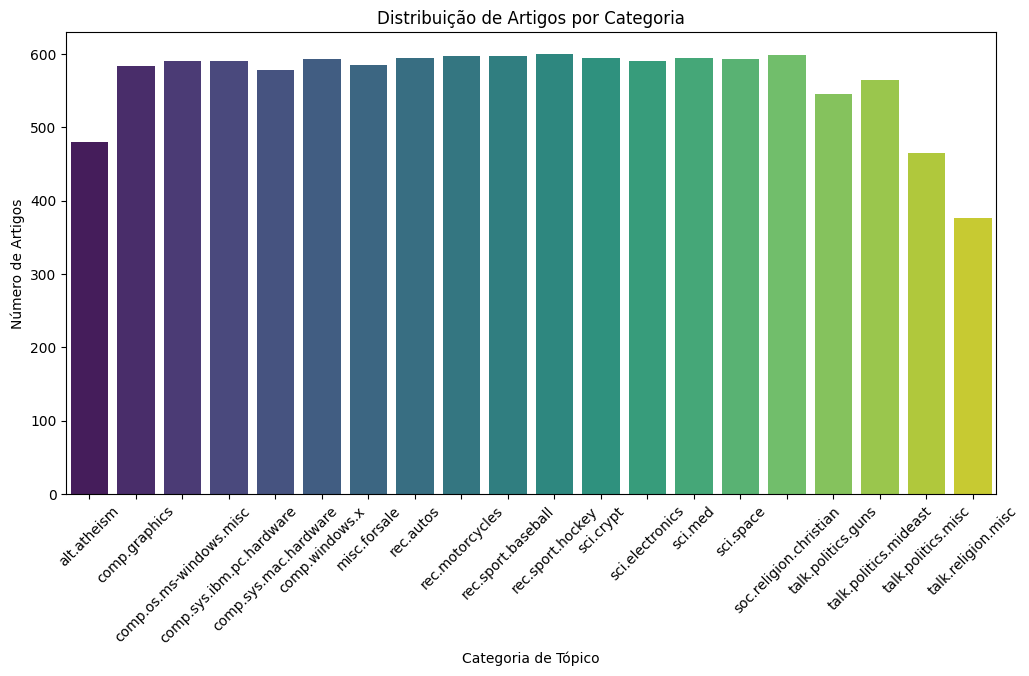

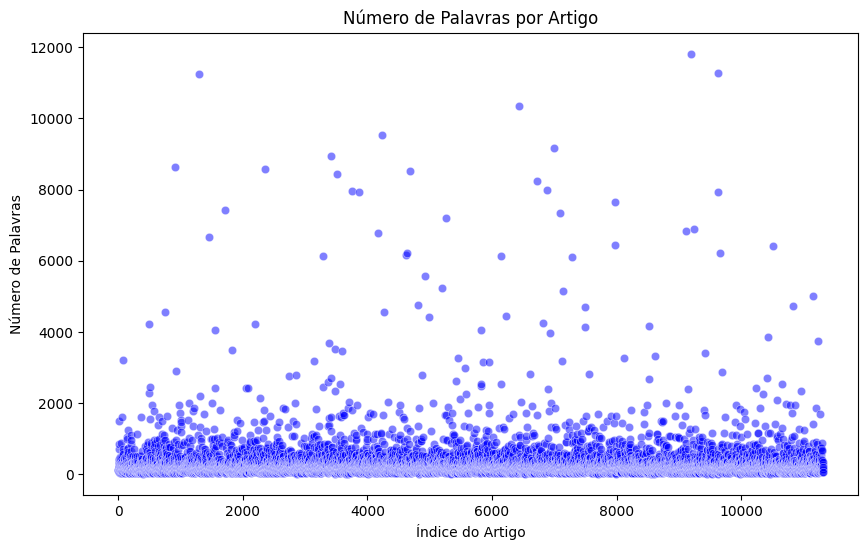

<ipython-input-5-76e1bd67b841>:55: FutureWarning: The provided callable <function mean at 0x7a0f4a7895a0> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  pivot_df = pd.pivot_table(df, values=df.columns[:-1], index='target', aggfunc=np.mean)


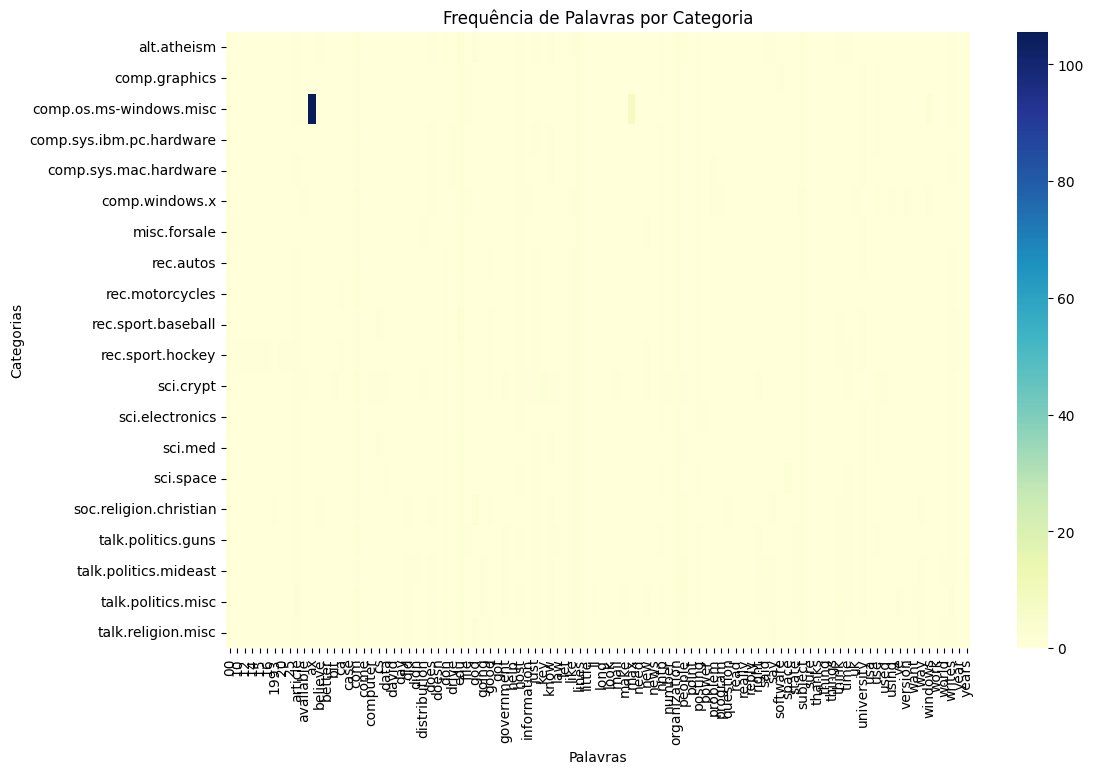

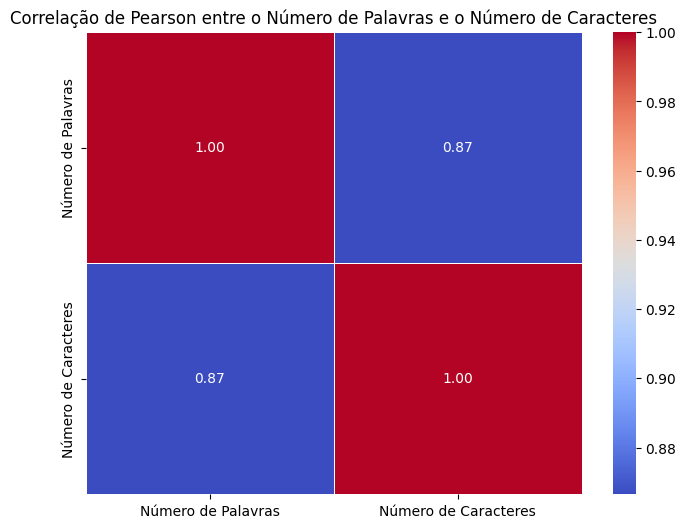

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import pandas as pd

# Carregar o dataset
newsgroups = fetch_20newsgroups(subset='train')

# 1. Gráfico de Barras - Distribuição das Categorias de Tópicos
category_counts = [newsgroups.target.tolist().count(i) for i in range(len(newsgroups.target_names))]

# Criando o DataFrame para facilitar o uso com Seaborn
category_df = pd.DataFrame({
    'Categoria': newsgroups.target_names,
    'Número de Artigos': category_counts
})

# Gráfico de barras com Seaborn
plt.figure(figsize=(12,6))
sns.barplot(x='Categoria', y='Número de Artigos', data=category_df, palette='viridis')
plt.title('Distribuição de Artigos por Categoria')
plt.xlabel('Categoria de Tópico')
plt.ylabel('Número de Artigos')
plt.xticks(rotation=45)
plt.show()

# 2. Gráfico de Dispersão - Número de Palavras por Artigo
num_words = [len(article.split()) for article in newsgroups.data]

# Criando o DataFrame para facilitar o uso com Seaborn
words_df = pd.DataFrame({
    'Índice do Artigo': range(len(num_words)),
    'Número de Palavras': num_words
})

# Gráfico de dispersão com Seaborn
plt.figure(figsize=(10,6))
sns.scatterplot(x='Índice do Artigo', y='Número de Palavras', data=words_df, alpha=0.5, color='blue')
plt.title('Número de Palavras por Artigo')
plt.xlabel('Índice do Artigo')
plt.ylabel('Número de Palavras')
plt.show()

# 3. Gráfico de Heatmap - Frequência de Palavras por Categoria
vectorizer = CountVectorizer(stop_words='english', max_features=100)
X = vectorizer.fit_transform(newsgroups.data)

# Transformando em um DataFrame para plotar o heatmap
df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
df['target'] = newsgroups.target

# Agrupar por categoria e calcular média de ocorrência de palavras
pivot_df = pd.pivot_table(df, values=df.columns[:-1], index='target', aggfunc=np.mean)

# Gráfico de Heatmap com Seaborn
plt.figure(figsize=(12,8))
sns.heatmap(pivot_df, cmap='YlGnBu', xticklabels=vectorizer.get_feature_names_out(), yticklabels=newsgroups.target_names)
plt.title('Frequência de Palavras por Categoria')
plt.xlabel('Palavras')
plt.ylabel('Categorias')
plt.show()

# 4. Cálculo da Correlação entre o Número de Palavras e o Número de Caracteres

# 4.1 Calcular o número de caracteres por artigo
num_chars = [len(article) for article in newsgroups.data]

# 4.2 Criar DataFrame com as duas variáveis numéricas
df_words_chars = pd.DataFrame({
    'Número de Palavras': num_words,
    'Número de Caracteres': num_chars
})

# 4.3 Calcular a correlação de Pearson entre as duas variáveis
correlation_matrix = df_words_chars.corr()

# 4.4 Plotar o heatmap da correlação
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title('Correlação de Pearson entre o Número de Palavras e o Número de Caracteres')
plt.show()


A Correlação de Pearson é uma medida que nos ajuda a entender a relação entre duas variáveis. Ela nos dá um valor entre -1 e 1, indicando o quanto uma variável está relacionada com a outra. Se a correlação for 1, significa que as variáveis têm uma relação positiva perfeita: quando uma aumenta, a outra também aumenta na mesma proporção. Se for -1, a relação é negativa perfeita, ou seja, quando uma variável aumenta, a outra diminui. Quando o valor é 0, isso quer dizer que não há uma relação linear entre elas, ou seja, uma variável não influencia a outra diretamente.

Para calcular essa correlação no pandas, usamos o método .corr(), que gera uma matriz de correlação para o conjunto de dados, mostrando as relações entre todas as variáveis numéricas. Com essa matriz, conseguimos ter uma visão geral de como as variáveis se relacionam entre si.

Já o heatmap ou mapa de calor é uma ferramenta visual que ajuda a interpretar essa matriz de correlação de forma mais intuitiva. Esse gráfico é feito com a biblioteca seaborn e transforma os valores da matriz em cores, onde cada célula representa uma correlação entre duas variáveis. No gráfico, usamos uma paleta de cores que vai do azul ao vermelho para representar a força e o tipo de correlação: o azul, por exemplo, pode indicar uma correlação negativa, enquanto o vermelho indica uma positiva.

###O 20 Newsgroups Dataset é um conjunto de dados de texto composto por postagens de grupos de discussão da Usenet, organizadas em 20 diferentes categorias ou grupos de notícias. Esses grupos abrangem uma ampla gama de tópicos, desde tecnologia e ciência até esportes, política e religião.
###Este dataset foi criado para representar discussões online públicas de várias comunidades sobre temas específicos, divididos em categorias temáticas. Cada documento no conjunto é uma postagem em um desses grupos, e o objetivo é usar esses textos para realizar tarefas de aprendizado de máquina, como classificação de texto, onde o modelo aprende a identificar a qual categoria (grupo de notícias) uma nova postagem pertence.
###O 20 Newsgroups Dataset busca representar a diversidade de tópicos e estilos de escrita presentes em discussões online, permitindo que pesquisadores e desenvolvedores testem algoritmos de PLN em problemas de classificação de texto. A tarefa principal é treinar modelos que possam distinguir entre textos de diferentes tópicos e aprender as características que diferenciam.
###Resumindo, 20 Newsgroups Dataset é uma representação de textos categorizados por tópicos variados, sendo uma ferramenta de testes de avaliação de sistemas que tratam de análise e classificação de grandes volumes de texto.
# ESTRUTURA

###Textos de postagens: O conteúdo principal das postagens feitas nos grupos de discussão da Usenet.
###Metadados: Informações adicionais associadas às postagens, como:
###⦁	Assunto: O título ou tópico da discussão.
###⦁	Autor: O remetente da mensagem (endereço de e-mail).
###⦁	Data: A data e hora em que a postagem foi feita.
###⦁	Grupo de Notícias: O grupo específico da Usenet ao qual a postagem pertence, representando uma das 20 categorias.
###Dados utilizados para tarefas de classificação de texto, análise de tópicos, entre outras.

# EXEMPLOS DE VARIAVEIS QUALITATIVOS

###⦁	Grupo de Notícias: Categoria à qual a postagem pertence (e.g., rec.sport.baseball, sci.med).
###⦁	Assunto: O título ou tema da postagem (e.g., “How to configure X server”).
###⦁	Autor: O remetente ou e-mail associado à postagem (e.g., johndoe@example.com).

# EXEMPLOS DE VARIAVEIS QUANTITATIVAS

###⦁	Comprimento do Texto: O número de caracteres ou palavras em cada postagem.
###⦁	Frequência de Palavras: Quantas vezes uma palavra específica aparece em uma postagem.
###⦁	Número de Postagens por Categoria: O total de postagens em cada um dos 20 grupos de notícias.
###⦁	Número de Mensagens por Autor

#Interpretação das Correlações Encontradas

##Correlação entre Postagens e Interações:

###O valor da correlação de Pearson, que será exibido após a execução do código, indicará se há uma relação forte ou fraca entre o número de postagens e o número de interações.
###Correlação Forte: Um valor próximo de 1 (por exemplo, 0.8 ou 0.9) indicaria que, à medida que o número de postagens aumenta, as interações também tendem a aumentar.
###Correlação Fraca: Um valor próximo de 0 (por exemplo, 0.2 ou -0.1) indicaria que não há uma relação clara entre postagens e interações.

##Correlação entre Frequência e Interações:

###O valor da correlação de Pearson entre a frequência e as interações também será exibido.
###Novamente, se o valor for alto, indicaria uma forte relação; se for baixo, uma relação fraca.

#O que é a Correlação de Pearson?

###A correlação de Pearson é uma medida estatística que expressa a relação linear entre duas variáveis contínuas.




In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

In [ ]:
# Carregar o dataset 20 Newsgroups
newsgroups = fetch_20newsgroups(subset='all')

In [ ]:
# Exibir as primeiras mensagens e categorias
print("Categorias:", newsgroups.target_names)
print("\nPrimeiras mensagens:")
for i in range(3):
    print(f"\nMensagem {i+1}:")
    print(newsgroups.data[i])

In [ ]:
# Criando um DataFrame com as postagens e categorias
df = pd.DataFrame({
    'Categoria': [newsgroups.target_names[i] for i in newsgroups.target],
    'Mensagem': newsgroups.data
})


In [ ]:

# Pré-processamento dos textos: Vetorização usando TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)  # Limitar a 1000 palavras mais frequentes
X = vectorizer.fit_transform(df['Mensagem'])